# EDA

In [1]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
result = pyreadr.read_r('/Users/zhenghuijing/Downloads/ECG/ECG_BNP_10sec_hashed_1.Rdata') 
#print(result.keys())
ECG_BNP_10sec_1 = result["ECG_BNP_10sec_1"]
df = pd.DataFrame(ECG_BNP_10sec_1) #14565 rows × 30006 columns
df.head(1)

PID        Age Gender        ECG_date_time  \
0  cb685a31f7c9a49786b071da363566af  79.948059   MALE  11-23-2020 13:34:24   

    Blood_date_time        BNP  I.1  I.2  I.3  I.4  ...  V6.2491  V6.2492  \
0  27-06-2016 08:01  147.06723  -14  -14  -15  -16  ...      -22      -21   

   V6.2493  V6.2494  V6.2495  V6.2496  V6.2497  V6.2498  V6.2499  V6.2500  
0      -20      -18      -18      -18      -17      -17      -17      -15  

[1 rows x 30006 columns]

#### create new variable represents ECG and BNP time difference

In [3]:
df['diff'] = df['ECG_date_time'] 
for i in range(len(df)):
    start = parse(str(df['ECG_date_time'][i]))
    end = parse(str(df['Blood_date_time'][i]))
    df['diff'][i] = (start-end).days

#### data description

In [4]:
df.describe()

Age           BNP           I.1           I.2           I.3  \
count  14565.000000  14565.000000  14565.000000  14565.000000  14565.000000   
mean      72.480702   2708.748062     -6.090216     -2.371644      8.303605   
std       12.235511   6699.256215    517.874875    930.732155    562.926035   
min        0.010959      5.000000 -26624.000000 -30947.000000  -8392.000000   
25%       66.016438    200.900000    -14.000000    -14.000000    -14.000000   
50%       74.205479    627.200000     -4.000000     -4.000000     -4.000000   
75%       81.232763   2067.000000      7.000000      7.000000      7.000000   
max       99.169863  69999.999000  16383.000000  32118.000000  28891.000000   

                I.4           I.5           I.6           I.7           I.8  \
count  14565.000000  14565.000000  14565.000000  14565.000000  14565.000000   
mean      -2.755098     -2.258565     -2.846962     -3.543426     -3.917611   
std      180.747571    197.542933    180.015496    144.881814    141.559508   
min    -8392.000000  -8392.000000  -8392.000000  -8392.000000  -8392.000000   
25%      -14.000000    -14.000000    -14.000000    -14.000000    -14.000000   
50%       -4.000000     -4.000000     -4.000000     -4.000000     -4.000000   
75%        7.000000      8.000000      7.000000      7.000000      7.000000   
max    13575.000000  13058.000000  13318.000000   2831.000000   1581.000000   

       ...       V6.2491       V6.2492       V6.2493       V6.2494  \
count  ...  14565.000000  14565.000000  14565.000000  14565.000000   
mean   ...    -24.909715    -24.875729    -25.045314    -25.235839   
std    ...    464.119897    464.129192    464.153069    464.103144   
min    ...  -8392.000000  -8392.000000  -8392.000000  -8392.000000   
25%    ...    -16.000000    -16.000000    -16.000000    -16.000000   
50%    ...     -2.000000     -2.000000     -3.000000     -2.000000   
75%    ...      8.000000      9.000000      9.000000      9.000000   
max    ...   1159.000000   1157.000000   1258.000000   1364.000000   

            V6.2495       V6.2496       V6.2497       V6.2498       V6.2499  \
count  14565.000000  14565.000000  14565.000000  14565.000000  14565.000000   
mean     -25.476965    -25.586955    -25.681771    -25.703811    -25.670855   
std      464.100833    464.085919    464.134421    464.150871    464.160078   
min    -8392.000000  -8392.000000  -8392.000000  -8392.000000  -8392.000000   
25%      -16.000000    -16.000000    -16.000000    -16.000000    -16.000000   
50%       -3.000000     -3.000000     -3.000000     -3.000000     -2.000000   
75%        8.000000      8.000000      8.000000      8.000000      8.000000   
max     1470.000000   1498.000000   1526.000000   1446.000000   1366.000000   

            V6.2500  
count  14565.000000  
mean     -25.655613  
std      464.184965  
min    -8392.000000  
25%      -16.000000  
50%       -3.000000  
75%        8.000000  
max     1366.000000  

[8 rows x 30002 columns]

## Missing value & outlier check

#### no missing values

In [5]:
print(df.isnull().sum())

PID                0
Age                0
Gender             0
ECG_date_time      0
Blood_date_time    0
                  ..
V6.2497            0
V6.2498            0
V6.2499            0
V6.2500            0
diff               0
Length: 30007, dtype: int64


#### outlier points exist

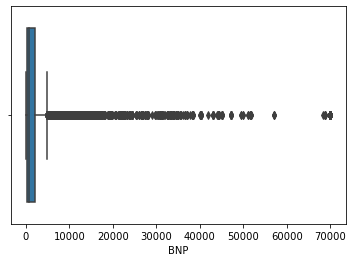

In [6]:
sns.boxplot(x="BNP", data = df)
plt.show() 

## Data visualization

#### Using original data (before removing outliers)

#### Plot1: ECG and BNP ime difference  
#### Plot2: BNP distribution 
#### Plot3: Age distribution 

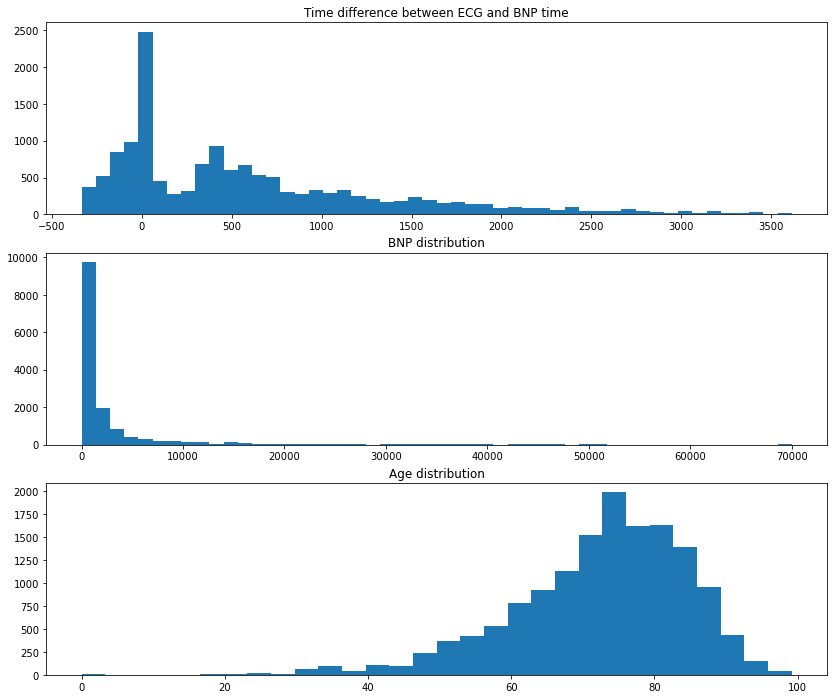

In [7]:
plt.figure(figsize =(14,12))
plt.subplot(311).set_title('Time difference between ECG and BNP time')
plt.hist(df['diff'],bins=50)
# try to filter data with time difference less then 3 month
df_tfilter = df.loc[abs(df['diff'])<= 90]
ratio = len(df_tfilter)/len(df) # 25% of ECG has a "near" BNP time
plt.subplot(312).set_title('BNP distribution')
plt.hist(df['BNP'],bins=50)
# try to filter data with BNP smaller then 125mg
df_bnpfilter = df.loc[abs(df['BNP'])<= 125]
ratio = len(df_bnpfilter)/len(df) # 16.5% of ECG has a "good" BNP value
plt.subplot(313).set_title('Age distribution')
plt.hist(df['Age'],bins=30)
plt.show()

#### Plot4: Scatter plot shows distribution of BNP, Age, Gender

In [8]:
fig = px.scatter(df,y='BNP',x='Age',color='Gender',width=500, height=400)
fig.show()

#### Plot5:ECG+BNP(12 leads seperately, only shows lead1 here)
#### compare ECG plot of "good" BNP patient(red) vs ECG of "bad" BNP patient(blue)
#### around 4000 records have a "good" BNP

In [9]:
df = pd.DataFrame(ECG_BNP_10sec_1) #14565 rows × 30006 columns

In [10]:
lead_bnpfilter = df.loc[(abs(df['BNP'])<= 125)|((abs(df['BNP'])<= 450)&(df['Age']>=75))]

In [11]:
lead_bnpfilter_index = lead_bnpfilter.index
print(lead_bnpfilter_index)
print(lead_bnpfilter.shape)

Int64Index([    0,     7,     8,     9,    10,    11,    22,    27,    28,
               30,
            ...
            14537, 14541, 14542, 14543, 14553, 14554, 14557, 14559, 14560,
            14561],
           dtype='int64', length=4064)
(4064, 30007)


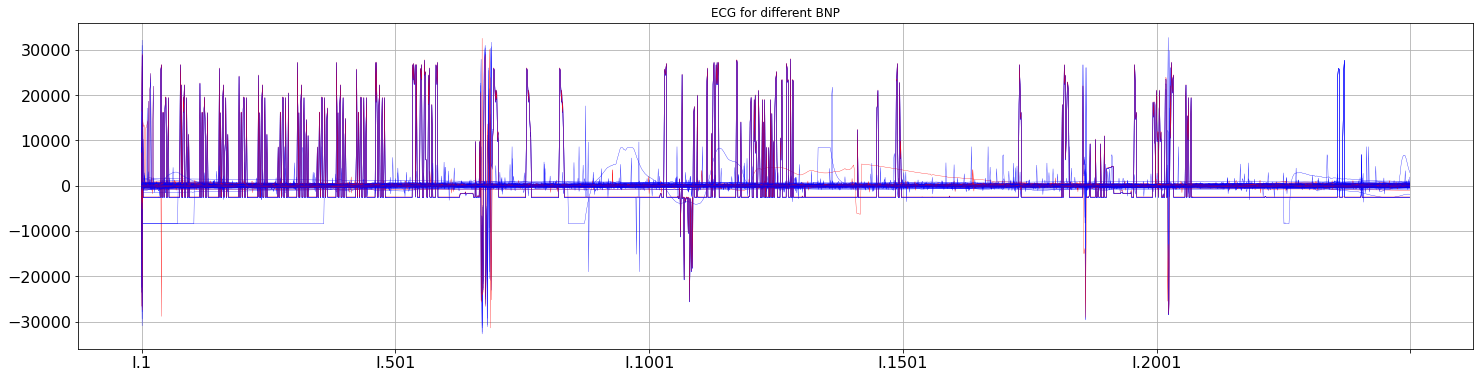

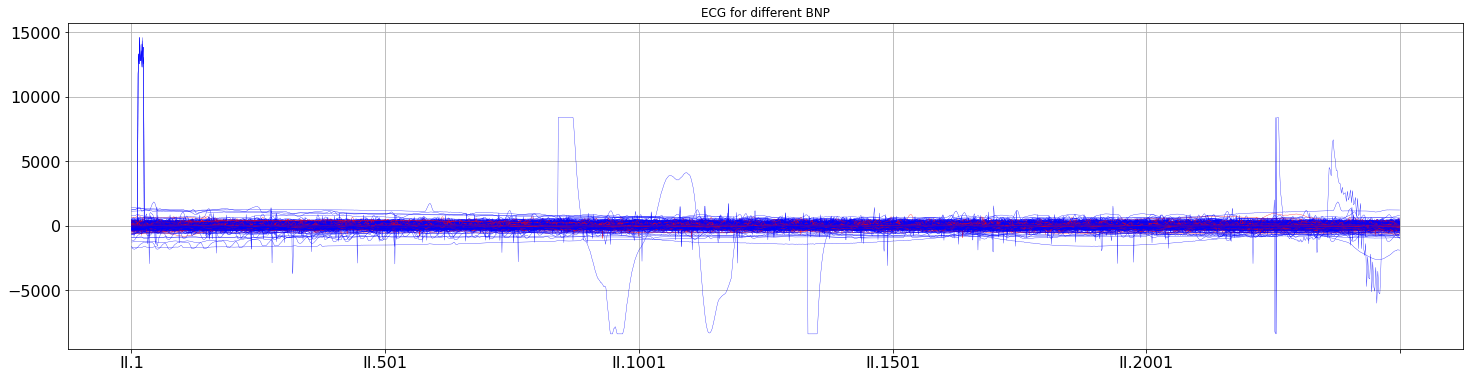

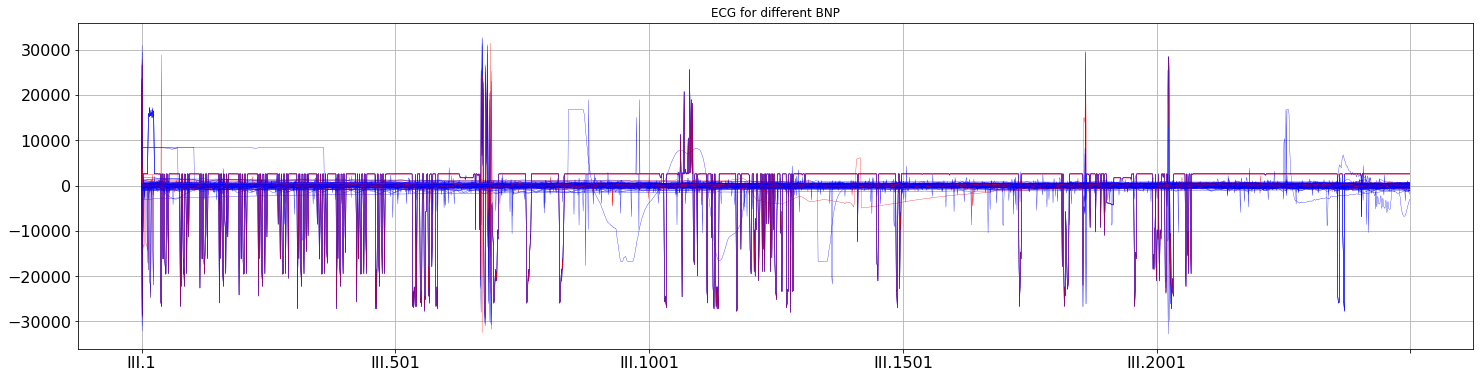

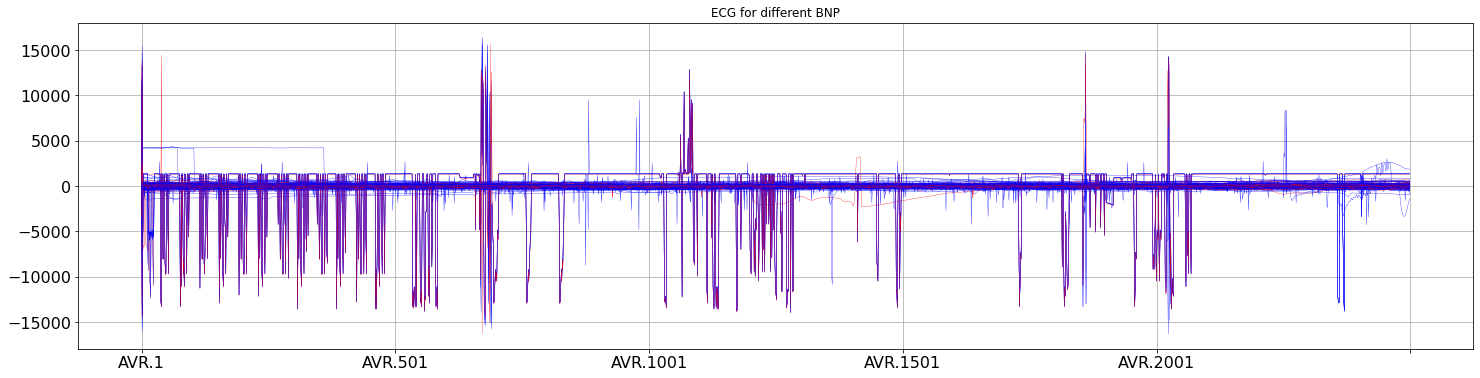

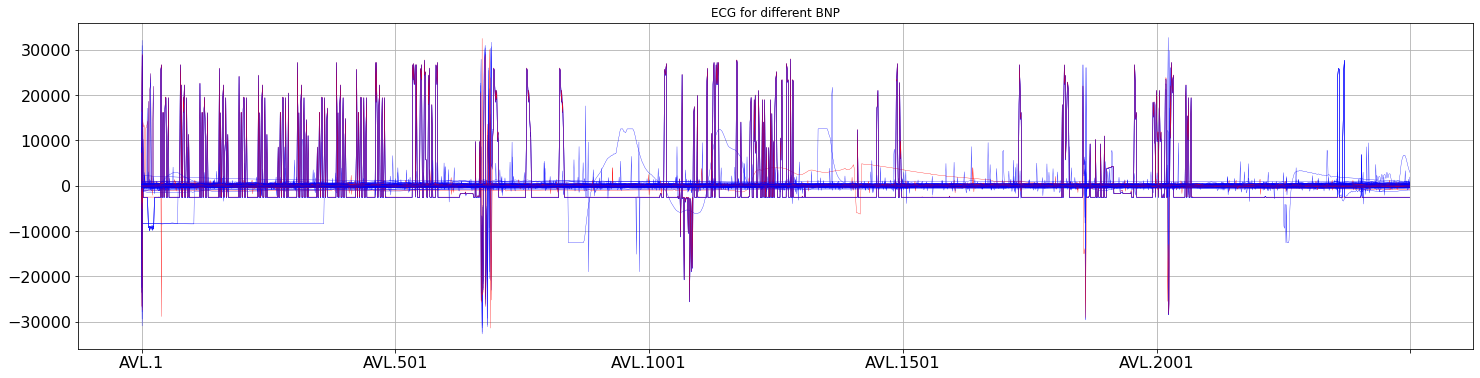

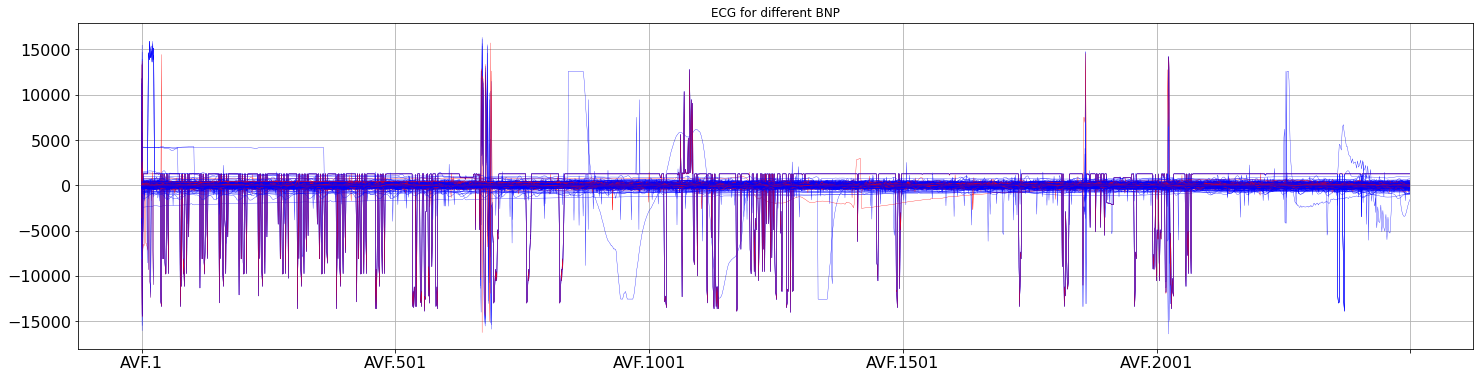

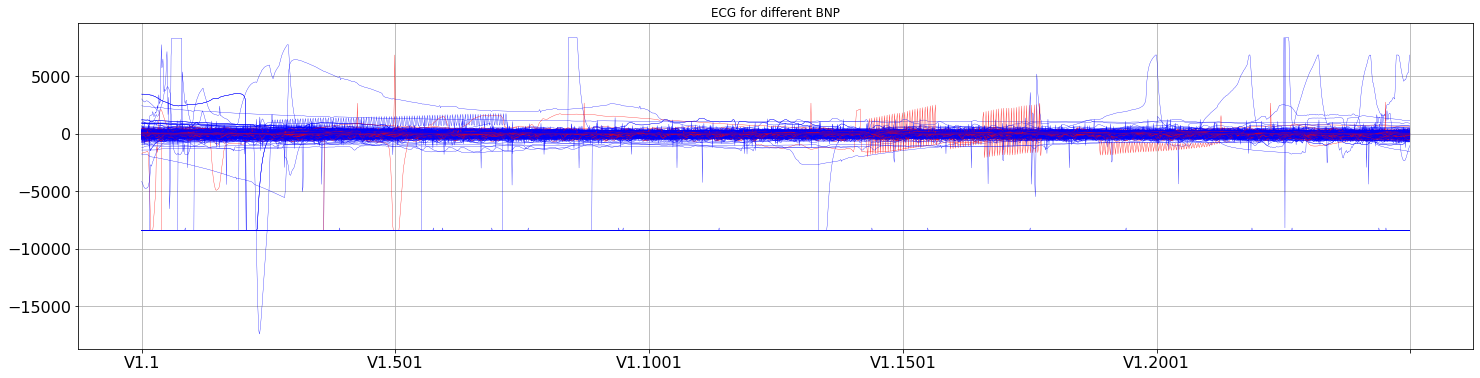

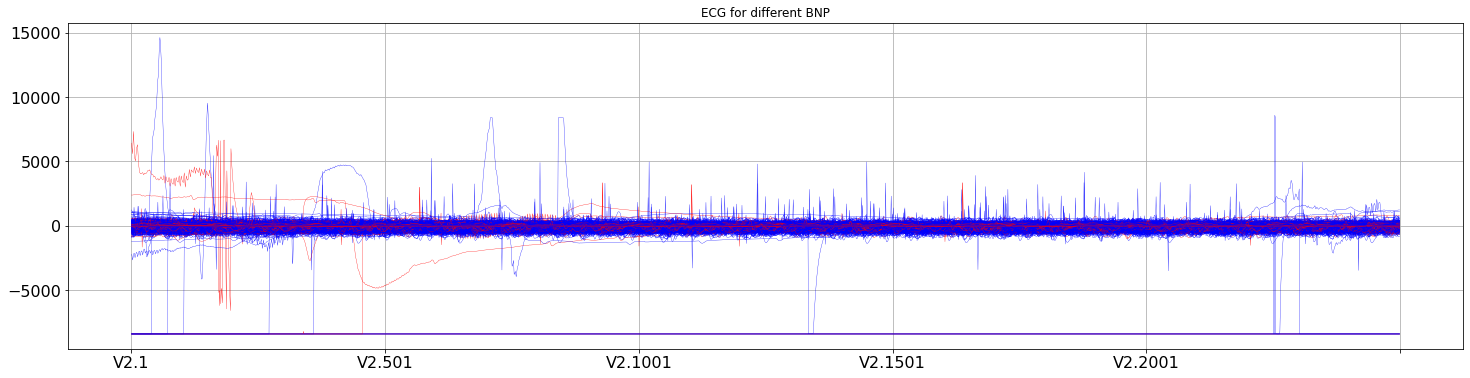

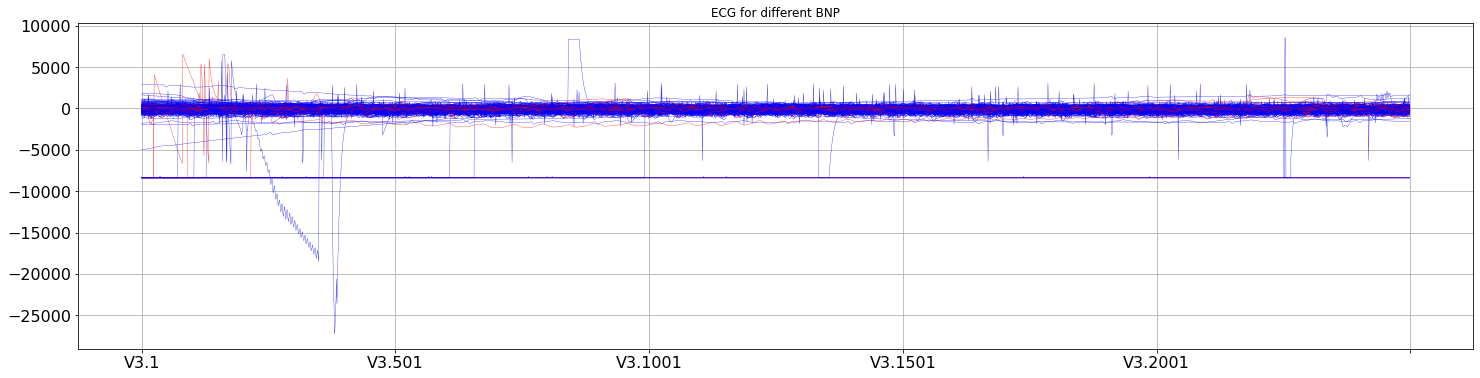

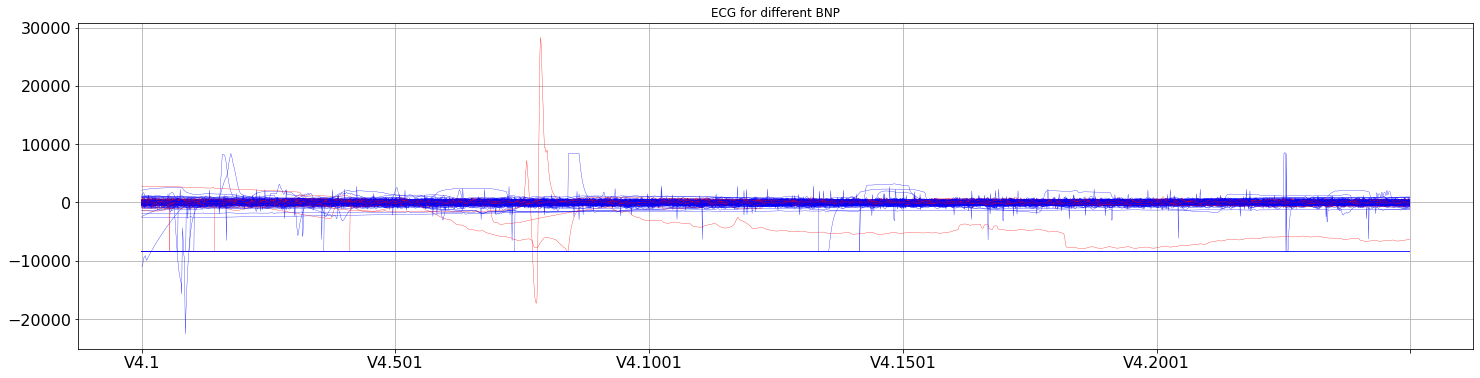

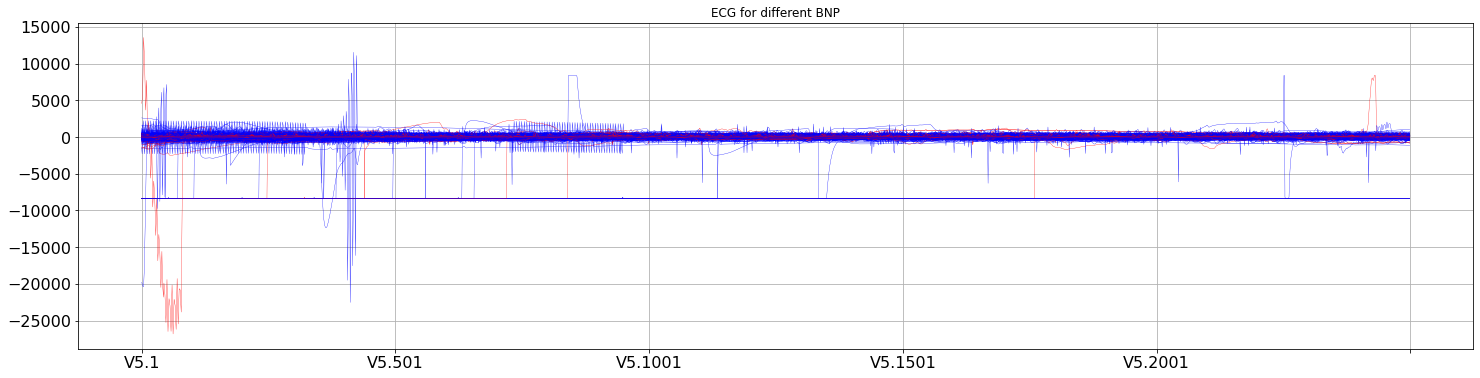

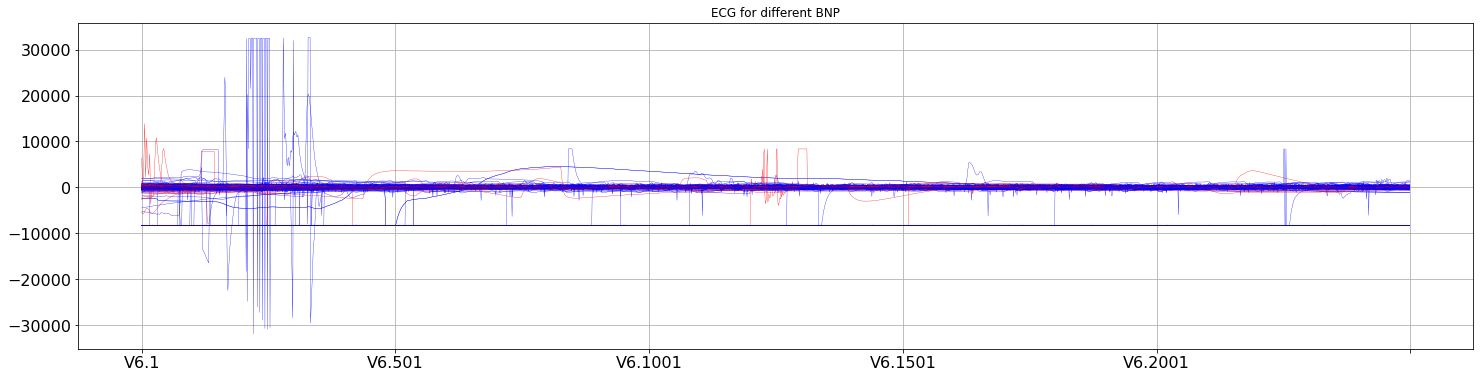

In [13]:
l = np.array([])
for i in range(len(lead_bnpfilter_index)):
    l = np.append(l,str(lead_bnpfilter_index[i]))
m = np.array([])
for j in range(len(df.index)):
    if str(j) in l:
        m = np.append(m,'red' ) 
    else:
         m = np.append(m,'blue' )
            
            
for lead_num in range(12):
    lead_i = df.iloc[0:df.shape[0],6+2500*lead_num:2506+2500*lead_num]
    lead_i= lead_i.transpose()
    fig, ax = plt.subplots()
    lead_i.plot(figsize=(25,6), title='ECG for different BNP', 
                lw=3, fontsize=16, ax=ax, grid=True, color = m, legend=False )
    for line in ax.get_lines():
        if line.get_label() in l:
            line.set_linewidth(0.3)
        else: line.set_linewidth(0.3)
    plt.show()

In [14]:
# ECG plot function
def ECG_plot(data):
    plt.figure()
    for i in range(12):
        j = 2500*i
        m = 6+j
        n = 2506+j
        data1 = data.transpose()
        data2 = data1.iloc[0,m:n]
        plt.subplot(6,2,i+1)
        data2.plot()
    fig = plt.gcf()
    fig.set_size_inches(30,15)
    plt.show()

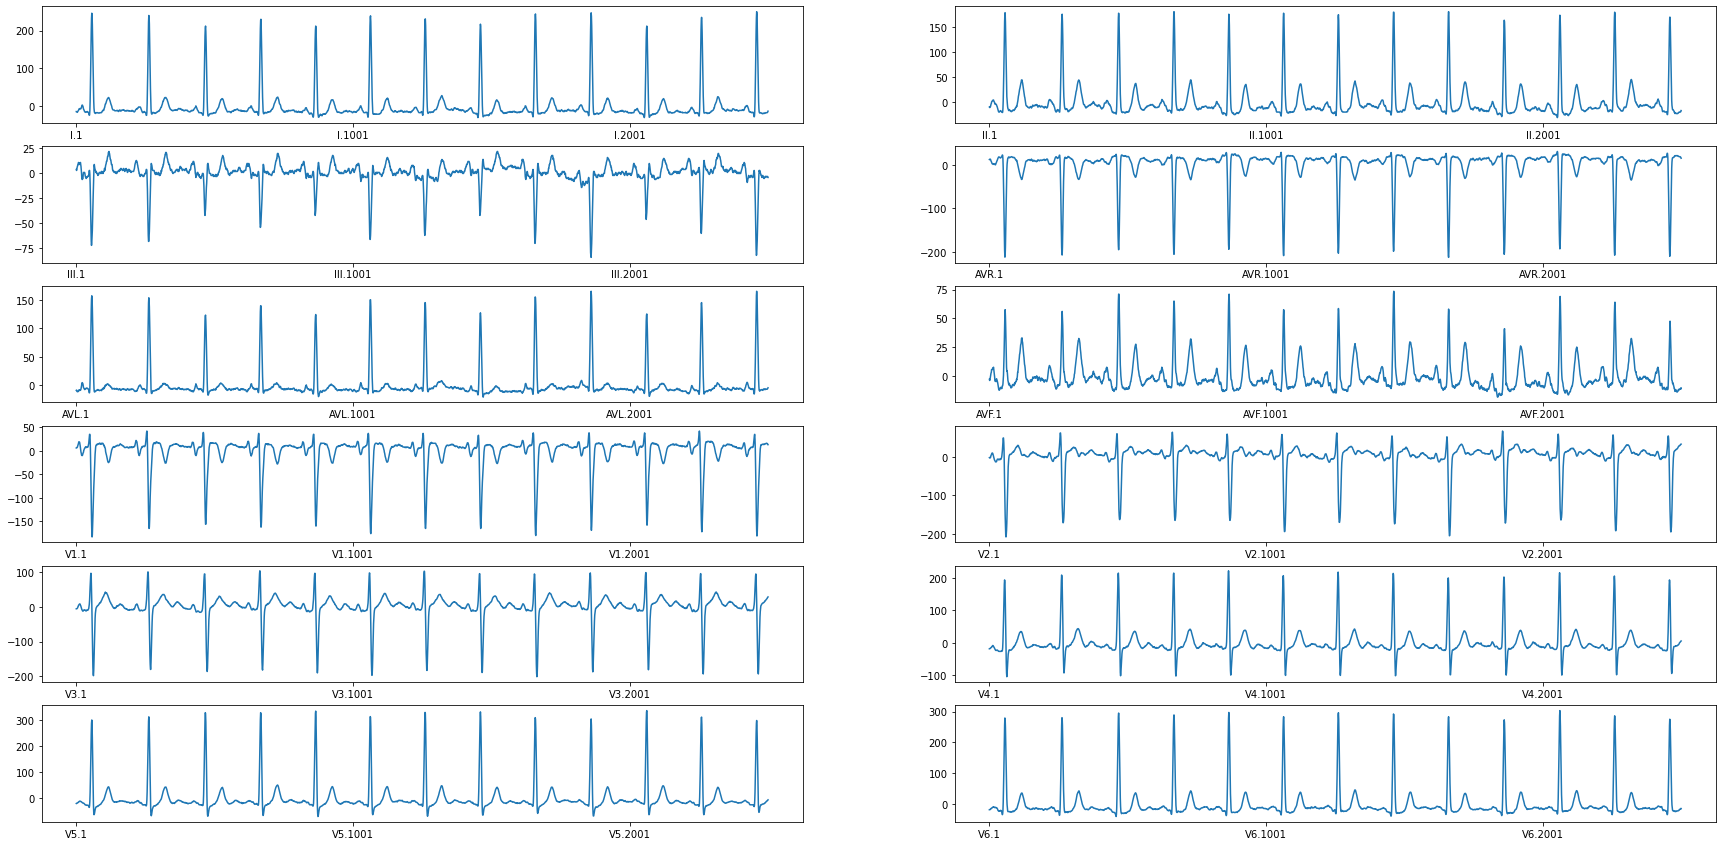

In [15]:
# Example: ECG plot for 12 leads for the first record
data = df.loc[0]
data = pd.DataFrame(data)
ECG_plot(data)

## Data transformation

#### remove outliers, equal to remove extreme large BNP value records (1831 records in total)

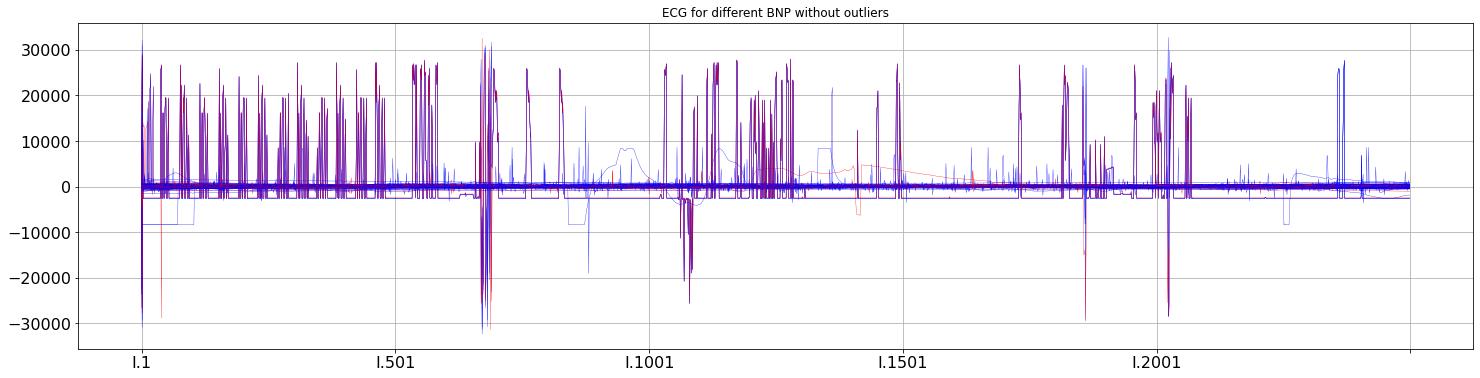

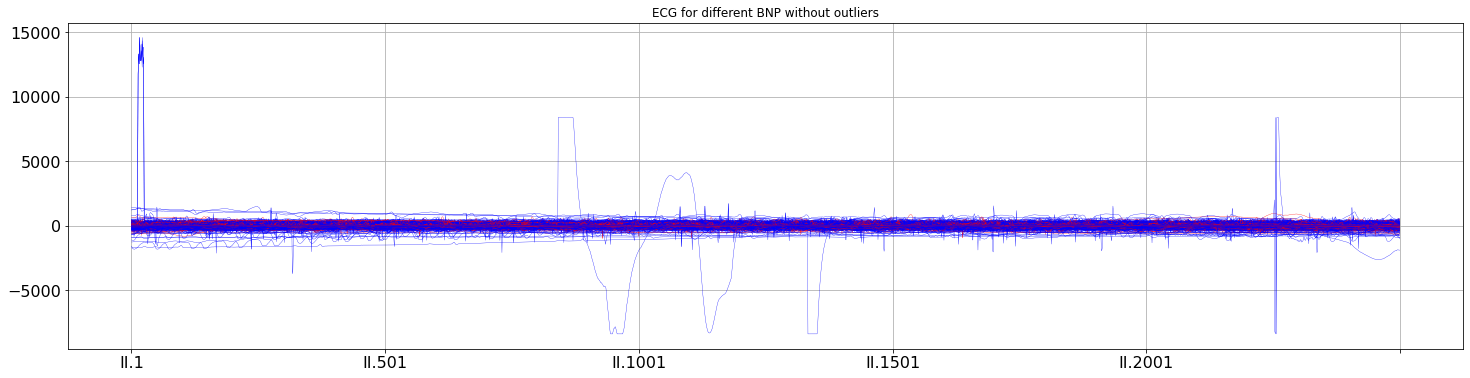

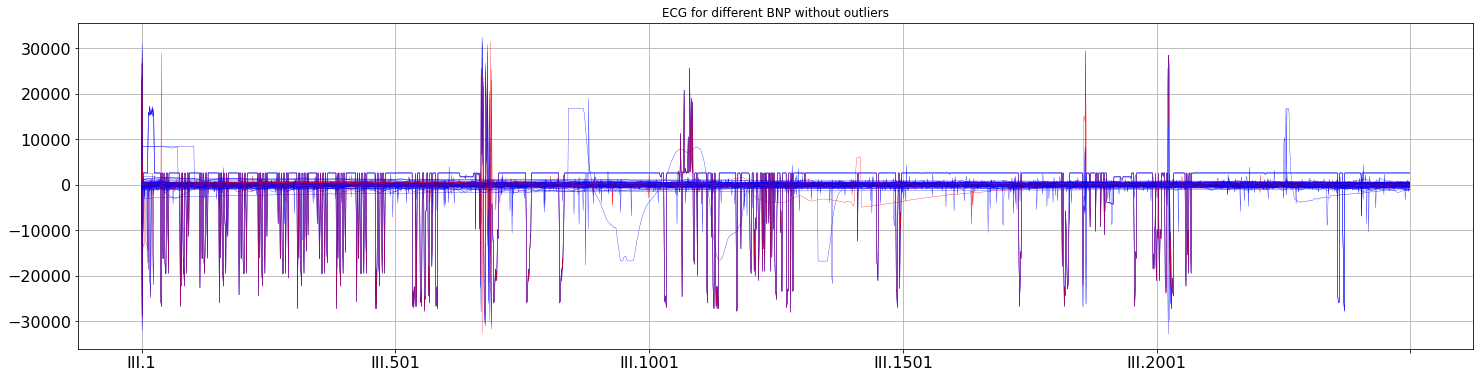

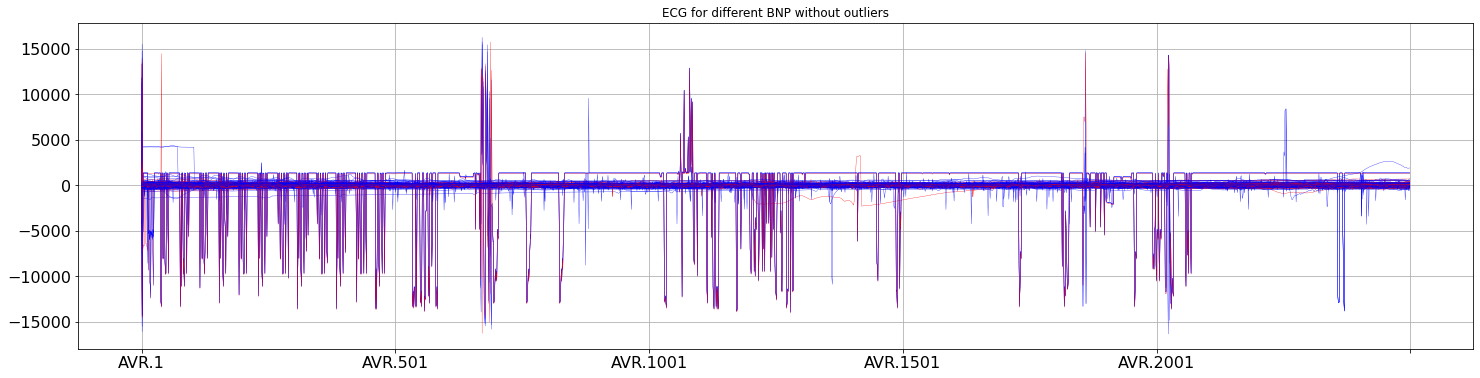

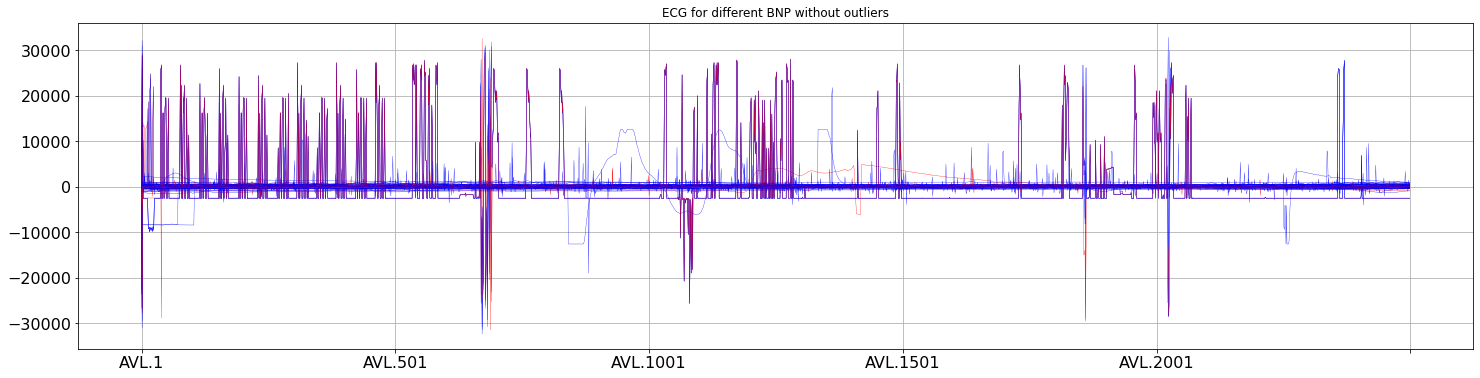

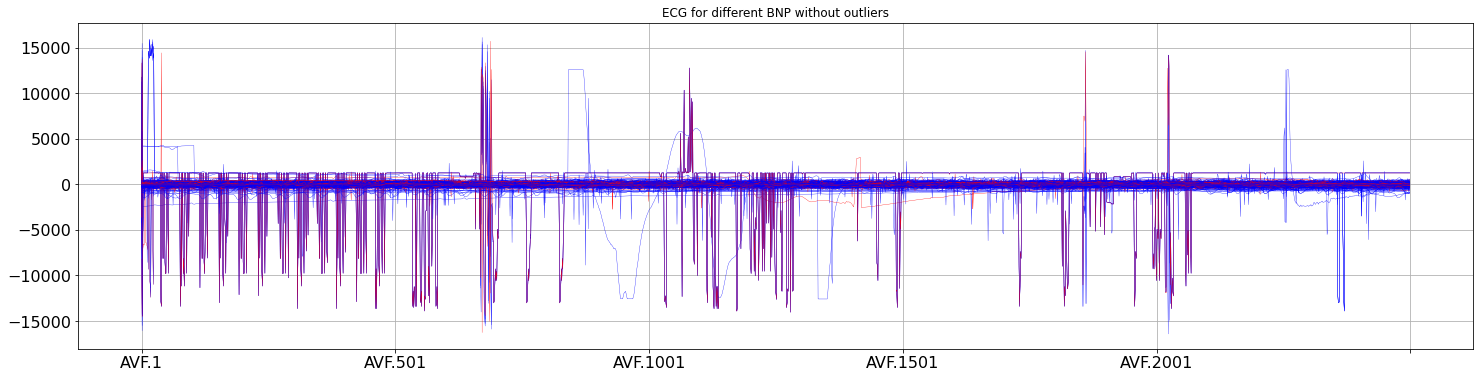

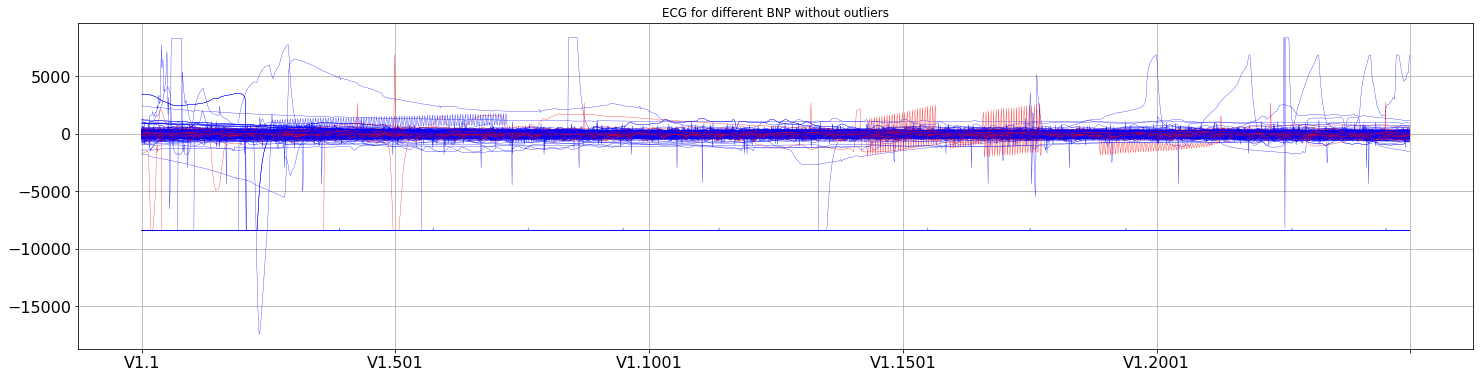

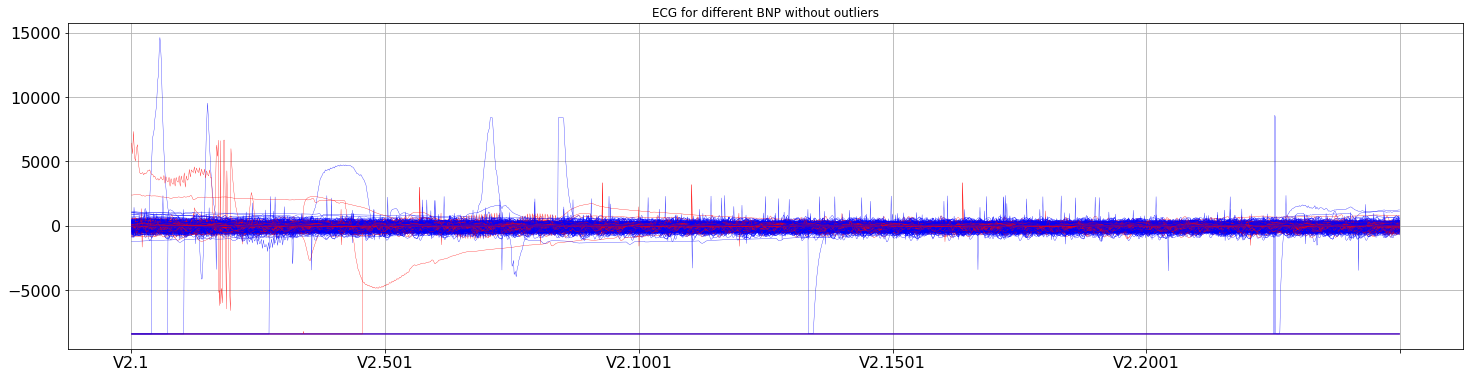

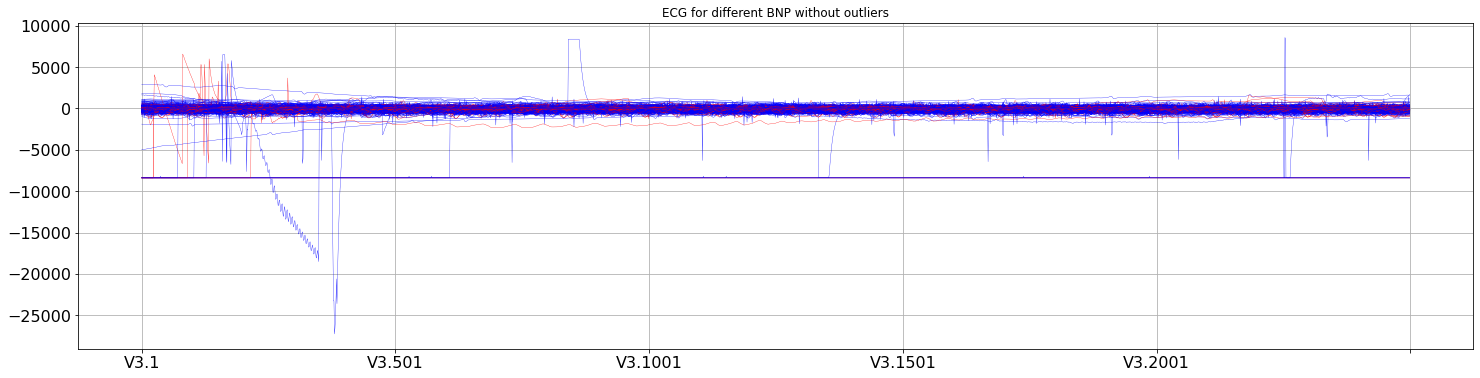

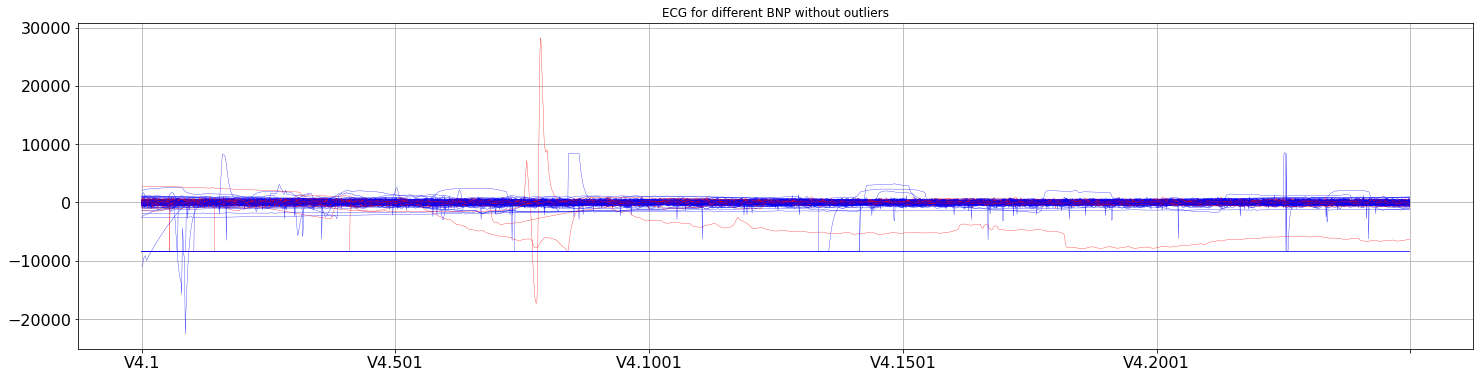

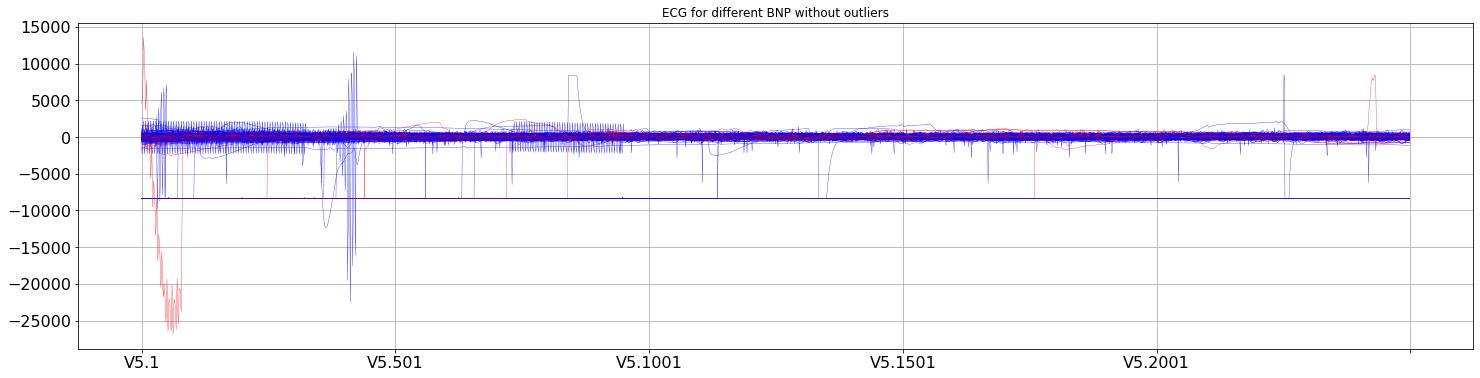

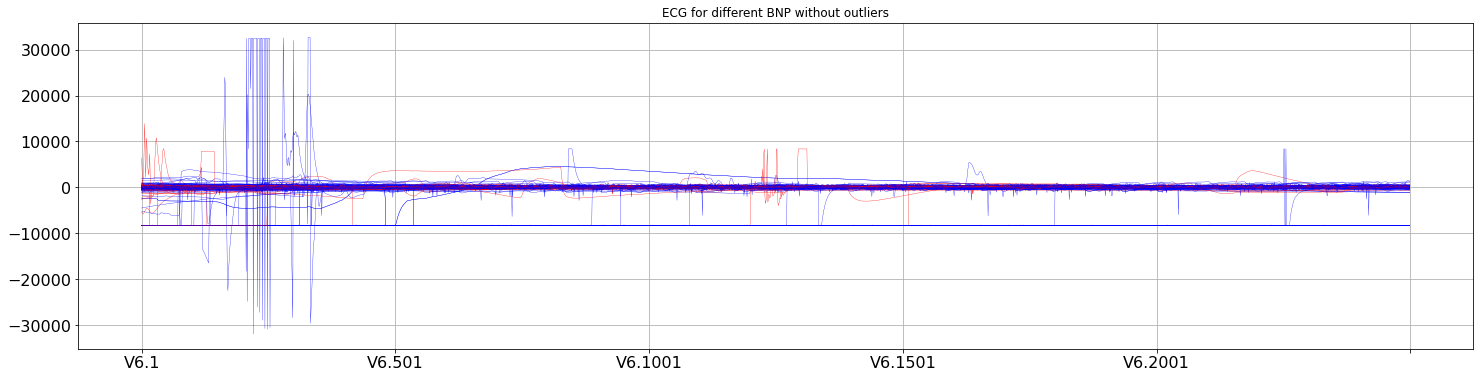

In [62]:
df_no_outliers = df.copy()
Q1 = np.percentile(df_no_outliers['BNP'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df_no_outliers['BNP'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
#Upper bound
upper = np.where(df_no_outliers['BNP'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df_no_outliers['BNP'] <= (Q1-1.5*IQR))
#Removing the Outliers
df_no_outliers.drop(upper[0], inplace = True)
df_no_outliers.drop(lower[0], inplace = True)
df_no_outliers = df_no_outliers.reset_index()
lead_bnpfilter_no_outliers = df_no_outliers.loc[(abs(df_no_outliers['BNP'])<= 125)|((abs(df_no_outliers['BNP'])<= 450)&(df_no_outliers['Age']>=75))]
lead_bnpfilter_no_outliers_index = lead_bnpfilter_no_outliers.index
l = np.array([])
for i in range(len(lead_bnpfilter_no_outliers_index)):
    l = np.append(l,str(lead_bnpfilter_no_outliers_index[i]))
m = np.array([])
for j in range(len(df_no_outliers.index)):
    if str(j) in l:
        m = np.append(m,'red' )
    else:
         m = np.append(m,'blue' )
            
            
for lead_num in range(12):
    lead_i = df_no_outliers.iloc[0:df_no_outliers.shape[0],7+2500*lead_num:2507+2500*lead_num]
    lead_i= lead_i.transpose()
    fig, ax = plt.subplots()
    lead_i.plot(figsize=(25,6), title='ECG for different BNP without outliers', 
                lw=3, fontsize=16, ax=ax, grid=True, color = m, legend=False )
    for line in ax.get_lines():
        if line.get_label() in l:
            line.set_linewidth(0.3)
        else: line.set_linewidth(0.3)
    plt.show()